# CPSC 330 hw2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:1}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv('spotify.csv', index_col=0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

In [4]:
print('# Training Examples: ' + str(len(df_train)))
print('# Test Examples: ' + str(len(df_test)))

# Training Examples: 1613
# Test Examples: 404


#### 1(c)
rubric={points:2}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range (max-min)? 

Note that `describe` returns another DataFrame.

In [5]:
print("Output of describe() on the training split:\n")
summary = df_train.describe()
print(summary)

Output of describe() on the training split:

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000

In [6]:
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
feature = summary.loc['range'].idxmin(axis=1)
print("\nThe feature with the smallest range is '" + feature + "' with a range of: " + str(summary[feature].loc['range']))


The feature with the smallest range is 'speechiness' with a range of: 0.5989


#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



![](img/loudness.png)

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [7]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

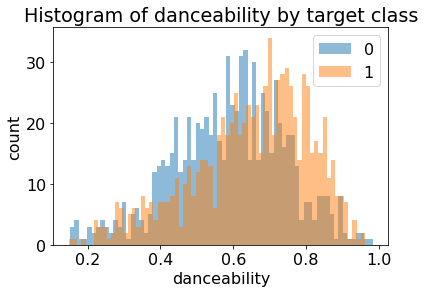

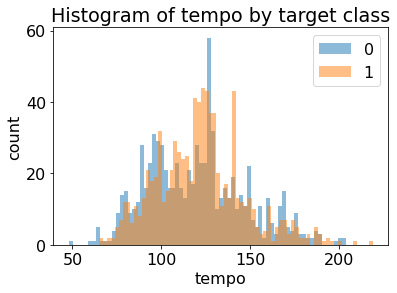

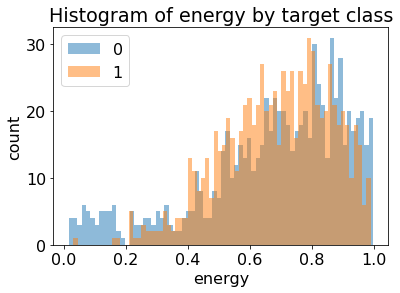

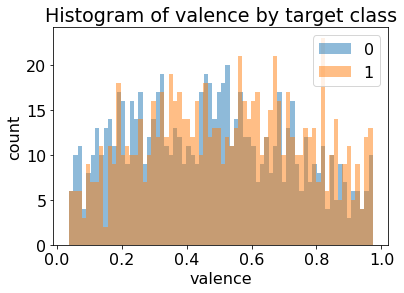

In [8]:
features = ['danceability', 'tempo', 'energy', 'valence']
negative_examples = negative_examples[features]
positive_examples = positive_examples[features]

def plot_feature_hist(negative_examples, positive_examples, feature):
    plt.hist(negative_examples[feature], bins=70, color='tab:blue', label='0', alpha=0.5)
    plt.hist(positive_examples[feature], bins=70, color='tab:orange', label='1', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Histogram of ' + feature + ' by target class')
    plt.legend(loc='best') 

for f in features:
    plot_feature_hist(negative_examples, positive_examples, f)
    plt.show()  

#### 1(e)
rubric={points:3}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

**Answer:** A reasonable split would be to predict 0 if danceability  <= 0.72 (and predict 1 otherwise). From the plots above, we can observe that to the left of the ~0.72 threshold, more songs were disliked (0) than liked (1), because the blue bars representing the 0 class tended to be higher (0 was more frequent). To the right of the ~0.72 threshold, the orange bars representing the 1 class tended to be higher (1 was more frequent), indicating that to the right of this threshold, more songs were liked (1) than disliked (0).

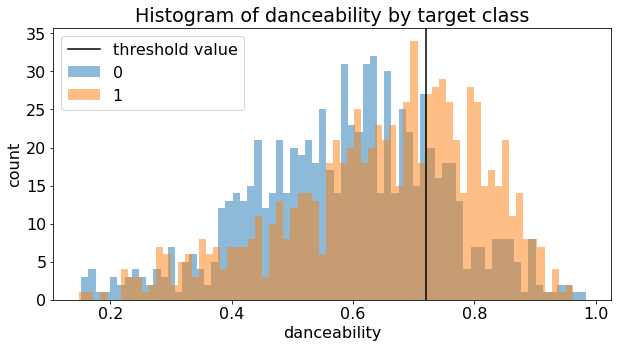

In [9]:
plot_feature_hist(negative_examples, positive_examples, 'danceability')
plt.axvline(0.72, 0, 1, label='threshold value', color='black')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

**Answer:** No, it could still be potentially useful to use that feature in conjuction with others if it is deeper in the decision tree. Consider the following example:

| A | B | Target |
| :-: | :-: | :-: |
| 0 | 0 | 0 |
| 0 | 0 | 0 |
| 10 | 10 | 0 |
| 10 | 0 | 1 |
| 10 | 0 | 1 |
| 0 | 10 | 1 |

On it's own, the histograms for feature B would be identical for both classes, and it might not be very helpful. But using the decision rules:
- Root: If A < 5 go to True Case, else go to False Case
- True Case: If B < 5 predict 0, else predict 1
- False Case: If B > 5 predict 0, else predict 1

We can obtain 100% accuracy on the above data, because the value of feature B is helpful when used in conjunction with feature A.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?

**Answer:** These features could be useful, because it is possible that there is some correlation between these free text fields and the user's preferences. One could imagine that rap fans might skew towards liking songs that have 'Lil' in the artist name, as that's a common convention in the genre. Or, the presence of words like 'Concerto', 'Sonata', 'Fugue' etc. in the title might tend to be more liked by the user, if they are fans of classical music. Furthermore, users might like songs they can remember easier, so perhaps the length of the song title is somewhat related to the user's preference. It would be difficult to use these in the model because we can't easily define conditions or thresholds around them. With some expert knowledge and intuition, we might be able to derive additional features from the raw data that is more easily transferrable. For example, we could extract the length of the song title, or the presence / absence of certain phrases (like 'Lil', or a list of classical styles) from the song or artist name.

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:3}

- Create `X_train` and `y_train` and `X_test` and `y_test` from the Spotify dataset. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [11]:
y_train = df_train['target']
X_train = df_train.drop(columns=['song_title', 'artist', 'target'], axis=1)
y_test = df_test['target']
X_test = df_test.drop(columns=['song_title', 'artist', 'target'], axis=1)

tree_classifier = DecisionTreeClassifier(max_depth=None)
tree_classifier.fit(X_train, y_train);
tree_classifier.score(X_train, y_train) # Not part of fit, but a sanity check to ensure the tree was fit correctly

0.9987600743955363

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding classes in `y_train`?  

Note: you can grab the first example with `X_train.iloc[[0]]`.

In [12]:
predicted = int(tree_classifier.predict(X_train.iloc[[0]]))
actual = y_train.iloc[0]
print('Predicted value was: ' + str(predicted) + '\nActual value was: ' + str(actual))
if predicted == actual:
    print('Prediction was correct')
else:
    print('Prediction was incorrect')

Predicted value was: 1
Actual value was: 1
Prediction was correct


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [13]:
cv_scores = cross_val_score(tree_classifier, X_train, y_train, cv=10)
print('The 10-fold cross-validation accuracies are: ' + str(cv_scores))
print('The average 10-fold cross-validation accuracy is: ' + str(np.mean(cv_scores)))

The 10-fold cross-validation accuracies are: [0.67901235 0.65432099 0.66049383 0.75776398 0.74534161 0.58385093
 0.68944099 0.70807453 0.62111801 0.69565217]
The average 10-fold cross-validation accuracy is: 0.6795069396518671


#### 2(d)
rubric={points:1}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [14]:
cv_scores = pd.DataFrame(cross_validate(tree_classifier, X_train, y_train, cv=10, return_train_score=True))
print(cv_scores)
print('Average cross-validation score: ' + str(np.mean(cv_scores['test_score'])) + '\nAverage training score: ' + str(np.mean(cv_scores['train_score'])))

   fit_time  score_time  test_score  train_score
0  0.018240    0.000000    0.703704     0.999311
1  0.015110    0.000000    0.648148     0.998622
2  0.016233    0.000000    0.654321     0.999311
3  0.017460    0.000000    0.732919     0.998623
4  0.016280    0.000000    0.757764     0.998623
5  0.016900    0.015702    0.627329     0.998623
6  0.012371    0.002717    0.714286     0.998623
7  0.007826    0.008732    0.739130     0.999311
8  0.010211    0.004874    0.633540     0.999311
9  0.015532    0.001099    0.701863     0.998623
Average cross-validation score: 0.6913005137642819
Average training score: 0.9988978817686291


**Answer:** No. Each time `cross_validate()` or `cross_val_score()` are run, they fit the model, and if there is a tie within the `DecisionTreeClassifier` it breaks this randomly. Therefore, the two scores can vary slightly because there is a small level of randomness in the way the model is fit each time. Note, this is not due to the random re-shuffling of data - that only occurs during train/test split.

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

**Answer:** Yes, due to overfitting. The training score is close to 1.0 and the test score is close to 0.70 The decision tree was fit with `max_depth=None`, meaning it will be as complex as necessary to near-perfectly fit the training set. However, it performs significantly worse on test data it has not seen before, because it's decision boundaries are likely overly and arbitrarily specific. This is an example of *overfitting*, where the data is too specific to the training set (train score is high), but does not generalize well to unseen data (test score is significantly worse). A less complex model (lower `max_depth`) might do better.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [15]:
print('The std. deviation of the 10-fold cross-validation accuracy is: ' + str(np.std(cv_scores['test_score'])))

The std. deviation of the 10-fold cross-validation accuracy is: 0.04459722036593837


**Answer:** The sub-scores give us an idea of the variability across each fold. The standard deviation above represents how far away from the mean each fold of the validation was, on average. A lower value value indicates less variability and therefore higher trustworthiness, whereas very high values of variability indicate a low degree of trustworthiness in the mean cross-validation score.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

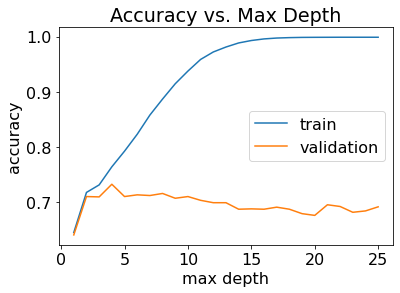

In [16]:
depth_scores = {'max_depth': [], 'validation_accuracy': [], 'train_accuracy': []}
for depth in range(1,26):
    tree_classifier = DecisionTreeClassifier(max_depth=depth)
    cv_scores = pd.DataFrame(cross_validate(tree_classifier, X_train, y_train, cv=10, return_train_score=True))
    depth_scores['max_depth'].append(depth)
    depth_scores['validation_accuracy'].append(np.mean(cv_scores['test_score']))
    depth_scores['train_accuracy'].append(np.mean(cv_scores['train_score']))
depth_scores = pd.DataFrame(depth_scores)
depth_scores.plot(x='max_depth', y=['train_accuracy', 'validation_accuracy'], title='Accuracy vs. Max Depth')
plt.legend(['train', 'validation'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [17]:
depth_scores['difference'] = depth_scores['train_accuracy'] - depth_scores['validation_accuracy']
depth_scores.head()

,max_depth,validation_accuracy,train_accuracy,difference
0,1,0.641063,0.645519,0.004457
1,2,0.710505,0.717986,0.007481
2,3,0.709888,0.731625,0.021737
3,4,0.732781,0.764345,0.031564
4,5,0.710517,0.792658,0.082141


**Answer:** As `max_depth` increases, the model naturally increases the depth of its decision tree in an effort to more closely fit the training data: 
- Training accuracy continues to increase, although it plateaus out at deeper trees because the improvements are less and less important (it is fine tuning until perfect). 
- Validation accuracy increases until `max_depth=4`, but it begins to decline as deeper conditions in the tree become overly specific to the training data, and fail to generalize (overfitting). 

This is the *fundemental tradeoff*: as model complexity (`max_depth`) increases, training accuracy increases (error decreases), but the difference between training and testing accuracy (or error) increases.

I would pick `max_depth=4`. It has the highest validation accuracy, which is a proxy for test and deployment accuracy, and the gap between train and validation accuracy isn't too small (underfit) or too large (overfit).

I don't think the `max_depth` chosen will necessarily generalize to other spotify users' datasets, due to a vast difference in preferences and listening habits:
- Users that have quite diverse music tastes might enjoy music from different genres, leading to a variety in tempo, loudness, length, and other features involved in deciding whether they like a song or not. For such users, deep decision trees might better predict the user's preference. 
- Other users might enjoy only a single genre, where features usually fall within a specific threshold and do not vary for that genre. For these users, shallow/simple decision trees would better predict the user's preference, because there is less variety in the features that characterize their taste in music.

For example, someone who listens exclusively to Electronic Dance Music (EDM) might benefit from a very simplistic decision stump that only looks at danceability, whereas someone who listens to multiple genres might need a deep decision tree to reflect the variability in their music taste.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [18]:
tree_classifier = DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(X_train, y_train)
train_score = tree_classifier.score(X_train, y_train) # Printed for the explanation, to
print(f'Train Score: {train_score}')                  # compare with the test score
test_score = tree_classifier.score(X_test, y_test)               
print(f'Test Score: {test_score}')

Train Score: 0.7693738375697459
Test Score: 0.693069306930693


**Answer:** The test score is fairly similar but slightly lower than the cross-validation score from before, which was around 0.73. This slight variation in accuracy can be explained by the inherent randomness in the way the data is shuffled when it was split. It's interesting to note that the train score, when trained on all the data, is also similar to the average train score during cross-validation at `max_depth=4`. Therefore, the difference between test and train scores in this exercise is similar to the difference between average validation and train scores during cross-validation at `max_depth=4`.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump?

**Answer:**

1. Given the condition `first_feature < 5.5` we predict `-1` in the `false` case and `+1` in the `true` case. 
2. We get a training accuracy of $\frac{5}{6} \approx{0.83}$. The predicted values are: $y\_pred = \begin{bmatrix} -1 \\ -1 \\ -1 \\ +1 \\ +1 \\ +1 \end{bmatrix}$, and this differs from $y$ by only one value.
3. Using the one threshold, one feature convention, we *cannot get 100% training accuracy with a single decision stump*. If we use the second column, this is impossible because 2 is a duplicate value with different results in $y$. If we use the first column, we cannot threshold the `+1` values to include 9 and 10, exclude 4 and 5, but also include 2, without making the logic too complex. However, we might, by chance, get 100% *testing* accuracy if the [2, 2, +1] row is an outlier, and the data otherwise follows our decision rule.

## Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Save your notebook.
3. Convert your notebook to `.html` format using the `convert_notebook()` function below **or** by `File -> Export Notebook As... -> Export Notebook to HTML`.
4. Run the code `submit()` below to go through an interactive submission process to Canvas.
>For this step, you will need a Canvas *Access Token* token. If you haven't already got one, log-in to Canvas, click `Account` (top-left of the screen), then `Settings`, then scroll down until you see the `+ New Access Token` button. Click that button, give your token any name you like and set the expiry date to Dec 31, 2020. Then click `Generate token`. Save this token in a safe place on your computer as you'll need it for all assignments. Treat the token with as much care as you would an important password. 

In [22]:
from canvasutils.submit import submit, convert_notebook

# Note: the canvasutils package should have been installed as part of your environment setup - 
# see https://github.com/UBC-CS/cpsc330/blob/master/docs/setup.md

In [23]:
convert_notebook("hw2.ipynb", "html")  # uncomment and run when you want to try convert your notebook to HTML (or you can convert manually from the File menu)

Notebook successfully converted! 


In [24]:
submit(course_code=53561, token=False)  # uncomment and run when ready to submit 

Please paste your token here and then hit enter:


 ······································································



Token successfully entered - thanks!


Select a file to submit:


Output()